# Breast Cancer Diagnosis Prediction


#### Project Description
The primary goal of this project is to perform Exploratory Data Analysis (EDA) on the Breast Cancer Wisconsin (Diagnostic) dataset to understand its structure, detect patterns, and identify key features that distinguish malignant from benign tumors. The ultimate aim is to gain insights that lay the foundation for building predictive models to support early and accurate breast cancer diagnosis.

#### Dataset used: The Breast Cancer Wisconsin (Diagnostic) Dataset
Dataset is from Kaggle - https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from IPython.display import display
from io import StringIO

In [5]:
# Load the dataset
data = pd.read_csv("data.csv")

In [7]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Dataset Structure
Dataset has 569 Instances and 32 features.
It has 30 Numerical columns and 2 additional columns (ID and Diagnosis. *ID is numerical but we can not use it as feature as it is just an identifier*)
Our TargetVariable is *diagnosis* - M (Malignant), B (Benign)


In [10]:
# Check for missing values
print("\nMissing values in each column:")
missing_values = data.isnull().sum()
display(missing_values)


Missing values in each column:


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# Drop 'id' and 'Unnamed: 32'
data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)

### Data Cleaning
Dropped the *id* column as it does not add value to analysis.
Looks like there was just an empty column at the end. It was removed as well

In [108]:
# Display dataset information
print("\nDataset Information:")
data_cleaned.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area

In [110]:
# Display summary statistics
print("\nSummary statistics:")
summary_stats = data_cleaned.describe()
display(summary_stats)


Summary statistics:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data Analysis
Verified that there are no missing values in the cleaned dataset.
A statistical summary of the features is generated above to understand distributions, ranges, and variances

In [112]:
# Check the distribution of the target variable
diagnosis_counts = data_cleaned['diagnosis'].value_counts()
print("\nDiagnosis counts:")
print(diagnosis_counts)


Diagnosis counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


### Target Variable Distribution

The distribution of the diagnosis variable revealed that Malignant (M): has 212 instances and Benign (B): has 357 instances

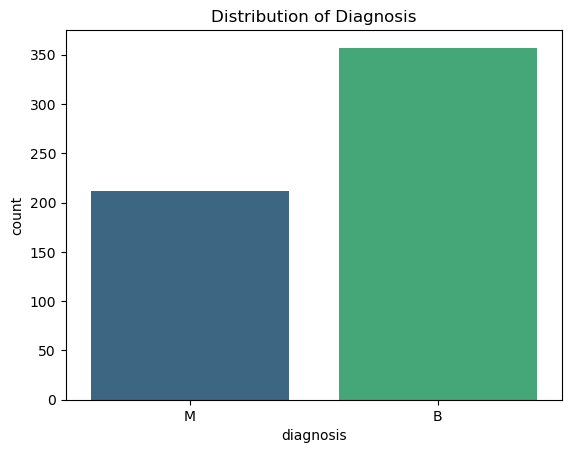

In [116]:
# Plot the distribution of the target variable
sns.countplot(data=data_cleaned, x='diagnosis', hue='diagnosis', dodge=False, palette='viridis', legend=False)
plt.title('Distribution of Diagnosis')
plt.show()

### Target Variable Distribution Visualization

Count plot highlights the imbalance between the two classes

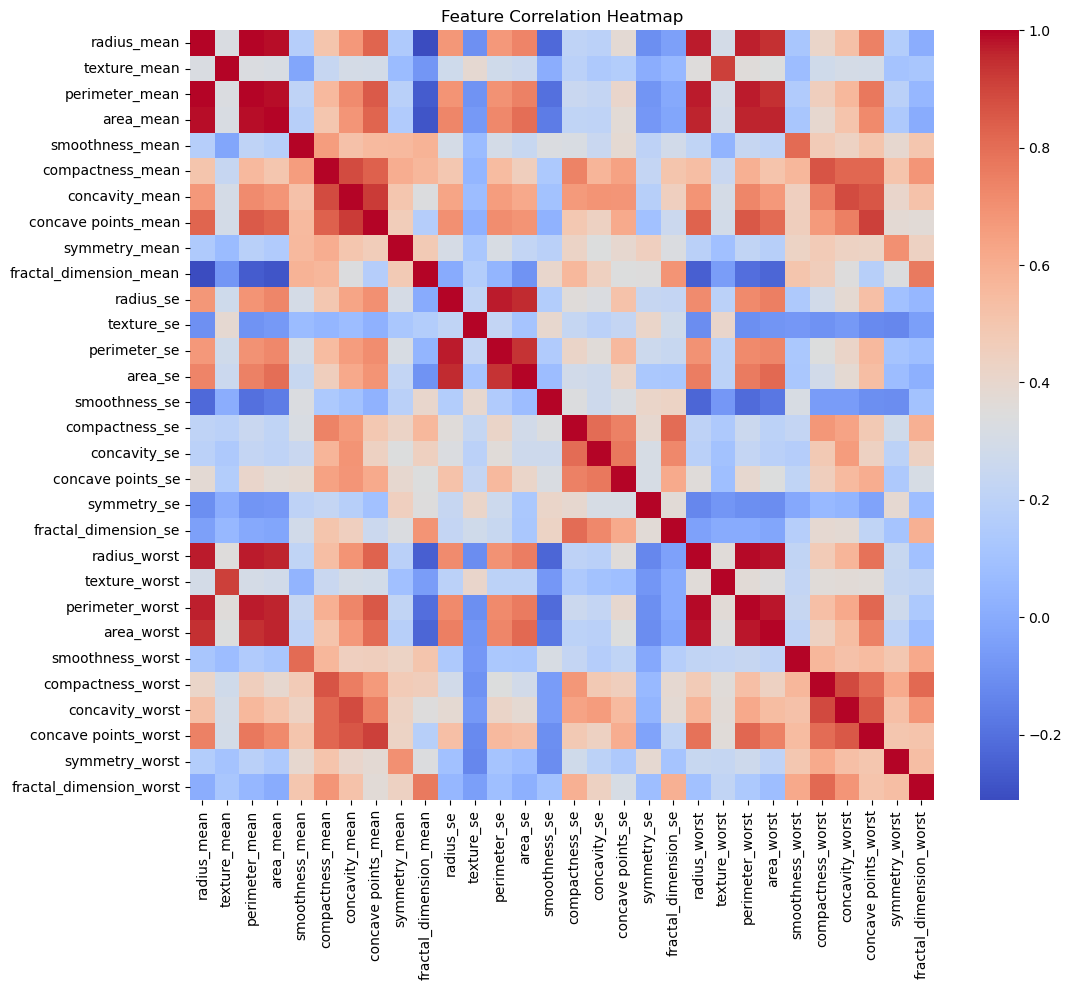

In [120]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

### Correlation Analysis

Heatmap generated generated above to visualize correlations among numerical features:

Strong positive correlations were observed among radius_mean, perimeter_mean, and area_mean, indicating these features are closely related and may capture similar information.

Features such as concave points_mean also showed strong positive correlations with these metrics, highlighting their relevance to tumor size and shape.

Features like smoothness_mean and fractal_dimension_mean have weaker correlations, suggesting they may provide complementary, independent insights.

The diagonal of the heatmap, representing self-correlations, shows the highest correlation values of 1, as expected.

This analysis identifies potential redundancy in strongly correlated features, which can be addressed during feature selection.

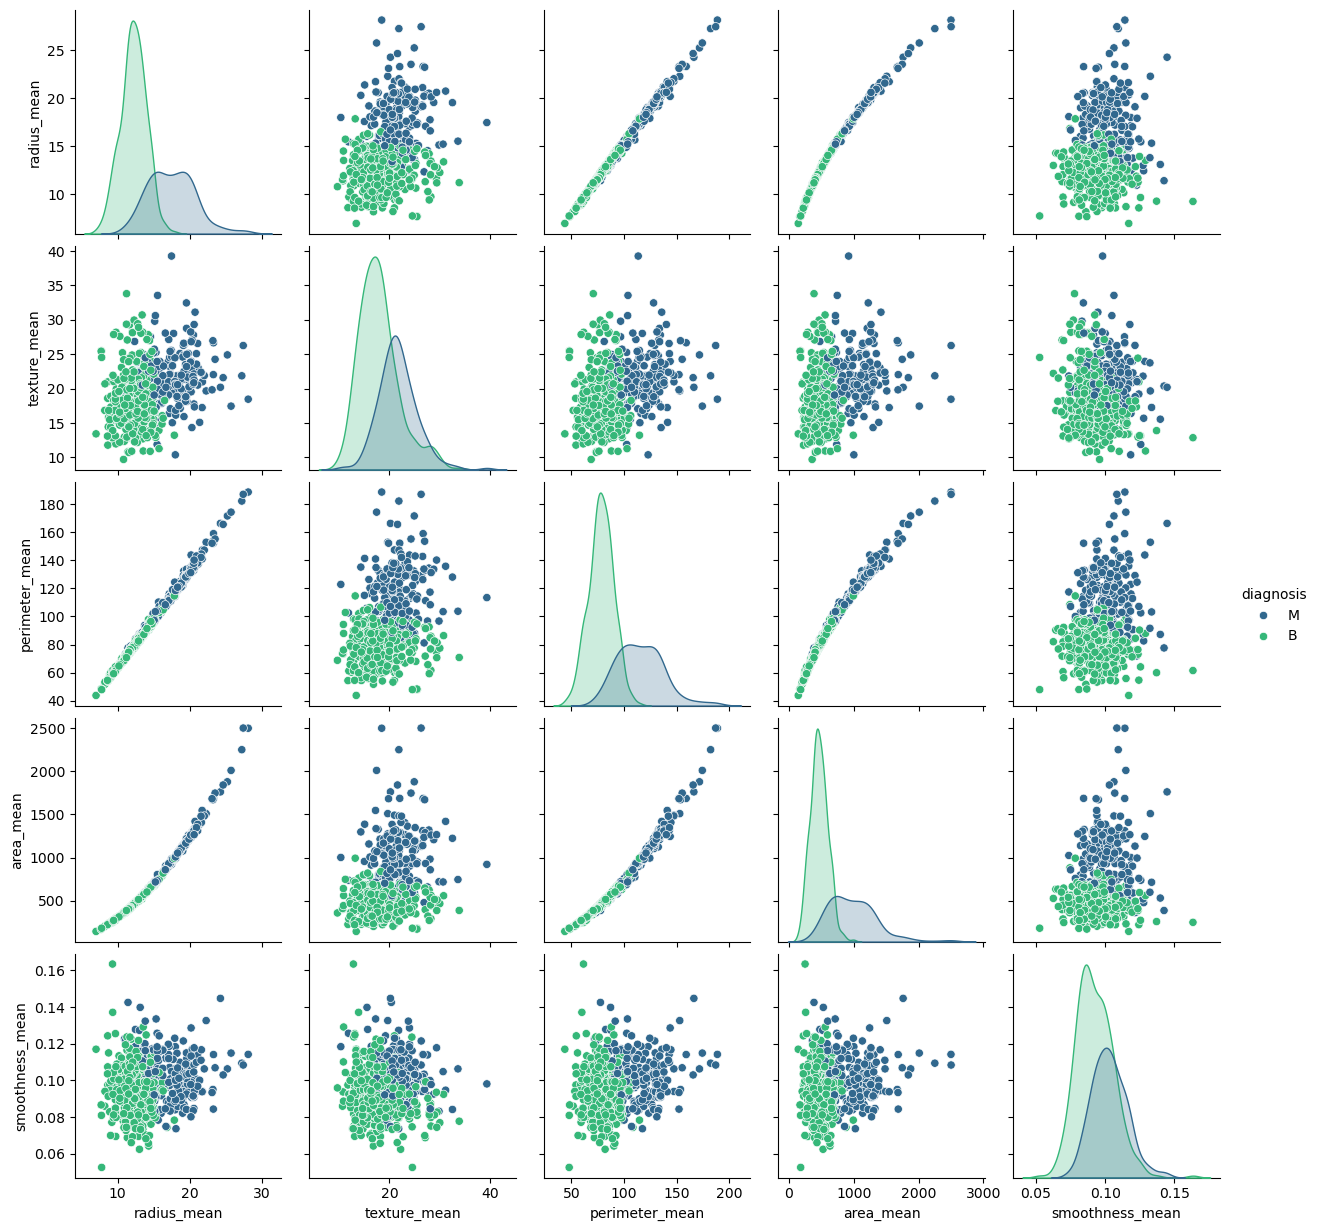

In [124]:
# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(data_cleaned, vars=selected_features, hue='diagnosis', palette='viridis')
plt.show()

### Pairwise Feature Analysis

Pairplot created above for selected features to visualize pairwise relationships and class separations:

Features such as radius_mean, perimeter_mean, and area_mean showed strong separations between malignant (M) and benign (B) diagnoses, indicating their high discriminatory power.

Overlapping regions were observed in features like smoothness_mean, which suggests they may contribute complementary but less distinct information for classification.

The diagonal plots highlight the distribution of each feature for both classes, with malignant cases generally exhibiting higher values.

The pairplot also highlights strong linear relationships among features like radius_mean, perimeter_mean, and area_mean, showing their high correlation as observed in the heatmap.

all in all -  the pairplot helps identify which features are more effective at distinguishing between the two classes. 

The most effective features observed are radius_mean, perimeter_mean, and area_mean, as they show clear separations between malignant and benign diagnoses in the scatterplots and their distributions.

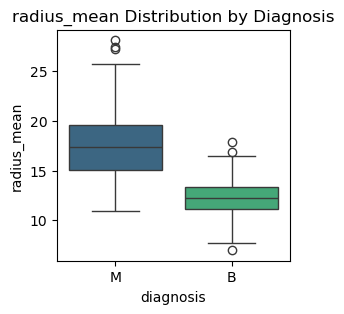

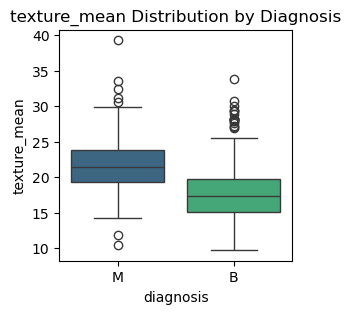

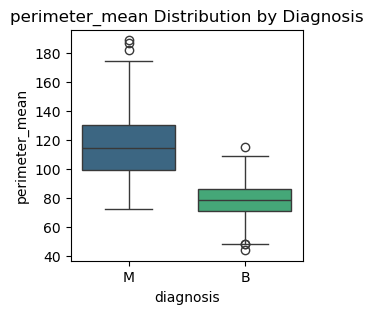

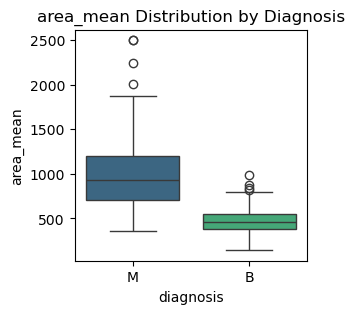

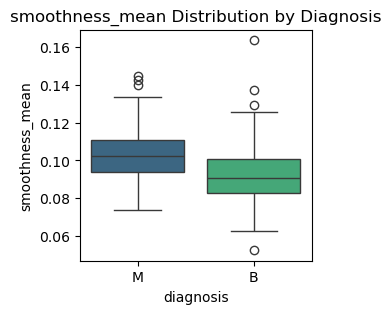

In [165]:
# Boxplots 
for feature in selected_features:
    plt.figure(figsize=(3, 3))
    sns.boxplot(data=data_cleaned, x='diagnosis', y=feature, hue='diagnosis', dodge=False, palette='viridis', legend=False)
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.show()

### Boxplots of Feature Distributions

Boxplots generated above to compare the distributions of selected features (radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean) between malignant and benign classes. 

radius_mean: Malignant tumors exhibit higher median values compared to benign tumors, with some outliers indicating extreme cases.

texture_mean: Both classes show a wider spread of values, but malignant tumors tend to have slightly higher medians and more outliers.

perimeter_mean: Similar to radius_mean, malignant tumors have much higher values, clearly distinguishing the two classes.

area_mean: This feature shows the greatest difference between the classes, with malignant tumors having a notably higher range and median.

smoothness_mean: There is lot of overlap between the two classes, indicating that this feature may provide less discriminatory power.

These boxplots highlight that features radius_mean, perimeter_mean, and area_mean are particularly useful in distinguishing between malignant and benign diagnoses.

----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------

# Data Preprocessing and Feature Engineering

Let us go ahead and Normalize the numberical features, Handle imbalance and perform PCA

In [171]:
# Import libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


In [177]:
# Separate features and target
X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']

# Encode the target variable (M=1, B=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete. Numerical features standardized.")


Feature scaling complete. Numerical features standardized.


### Feature Scaling
Standardized the numerical features in the dataset using StandardScaler. This ensures that all features are on the same scale

In [181]:
# Class Imbalance
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training set shape: {X_train.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}")


Original training set shape: (455, 30)
Resampled training set shape: (572, 30)


### Handling Class Imbalance
The dataset was imbalanced, with benign cases outnumbering malignant ones. Applied SMOTE (Synthetic Minority Oversampling Technique) to the training data, creating synthetic samples of the minority class (malignant). This resampling increased the number of training samples from 455 to 572, ensuring a balanced dataset and improving the model's ability to learn from both classes effectively.

In [190]:
# Dimensionality Reduction
# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

feature_contributions = np.argsort(-np.abs(pca.components_), axis=1)
original_features = X_train.columns.tolist()
top_features = [original_features[idx] for idx in feature_contributions[0]]

print(f"PCA-transformed training set shape: {X_train_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Top 10 contributing features to the first principal component: {top_features[:10]}")

PCA-transformed training set shape: (572, 10)
Explained variance ratio: [0.4526465  0.19637468 0.10015607 0.05873222 0.04588186 0.04087759
 0.02139255 0.01481104 0.01225065 0.01059479]
Top 10 contributing features to the first principal component: ['concave points_mean', 'concavity_mean', 'concave points_worst', 'perimeter_worst', 'radius_worst', 'compactness_mean', 'perimeter_mean', 'area_worst', 'area_mean', 'radius_mean']


### Dimentionality Reduction
I applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while retaining 95% of the variance. This process reduced the number of features from 30 to 10, significantly simplifying the dataset. The top components captured most of the variance, with the first two explaining over 65%. PCA helps mitigate redundancy in correlated features, such as radius_mean, perimeter_mean, and area_mean, while preserving critical information for model training. Features retained are printed out above

----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------

# Model Building and Evaluation

In [244]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [246]:
#Selecting and Training Models
# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Train models
logistic_model.fit(X_train_pca, y_train_resampled)
random_forest_model.fit(X_train_pca, y_train_resampled)
svm_model.fit(X_train_pca, y_train_resampled)

print("Models trained successfully.")

Models trained successfully.


In [248]:
# Evaluate each model on the test set
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_pca)
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1]
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}\n")

--- Logistic Regression ---
Accuracy: 0.9825
Precision: 0.9767
Recall: 0.9767
F1-Score: 0.9767
ROC-AUC: 0.9977

--- Random Forest ---
Accuracy: 0.9649
Precision: 0.9333
Recall: 0.9767
F1-Score: 0.9545
ROC-AUC: 0.9967

--- SVM ---
Accuracy: 0.9561
Precision: 0.9318
Recall: 0.9535
F1-Score: 0.9425
ROC-AUC: 0.9964



### Evaluating Models
Response above shows all 3 models performace metrics.

*Logistic Regression* has the highest accuracy and ROC-AUC, making it the best model in this scenario.

*Random Forest* did well, with high recall and ROC-AUC similar to Logic Regression, but has slightly lower precision compared to Logistic Regression.

*SVM* has good performance overall, but slightly lower overall accuracy and F1-Score.

In [251]:
#Hyperparameter Tuning for Random Forest
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search for Random Forest
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

grid_search.fit(X_train_pca, y_train_resampled)
best_model = grid_search.best_estimator_

print("Best Random Forest parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Random Forest parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


### Hyperparameter Tuning Results
A grid search was performed to optimize the hyperparameters of the Random Forest model using 5-fold cross-validation with parameters
n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]

Best Random Forest parameters identified are : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}  

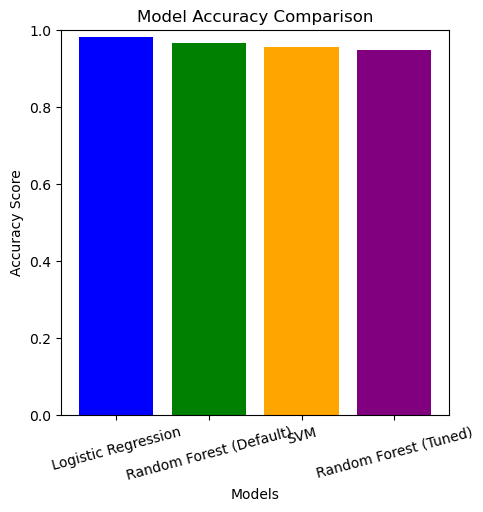

In [254]:
#Model Comparison
model_names = ["Logistic Regression", "Random Forest (Default)", "SVM", "Random Forest (Tuned)"]
accuracy_scores = [
    accuracy_score(y_test, logistic_model.predict(X_test_pca)),
    accuracy_score(y_test, random_forest_model.predict(X_test_pca)),
    accuracy_score(y_test, svm_model.predict(X_test_pca)),
    accuracy_score(y_test, best_model.predict(X_test_pca))  # Tuned Random Forest
]

# Plot the model comparison
plt.figure(figsize=(5, 5))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange', 'purple'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=15)
plt.show()

In [258]:
evaluation_metrics = {
    "Model": ["Logistic Regression", "Random Forest (Default)", "SVM", "Random Forest (Tuned)"],
    "Accuracy": [
        accuracy_score(y_test, logistic_model.predict(X_test_pca)),
        accuracy_score(y_test, random_forest_model.predict(X_test_pca)),
        accuracy_score(y_test, svm_model.predict(X_test_pca)),
        accuracy_score(y_test, best_model.predict(X_test_pca)),  # Tuned Random Forest
    ],
    "Precision": [
        precision_score(y_test, logistic_model.predict(X_test_pca)),
        precision_score(y_test, random_forest_model.predict(X_test_pca)),
        precision_score(y_test, svm_model.predict(X_test_pca)),
        precision_score(y_test, best_model.predict(X_test_pca)),
    ],
    "Recall": [
        recall_score(y_test, logistic_model.predict(X_test_pca)),
        recall_score(y_test, random_forest_model.predict(X_test_pca)),
        recall_score(y_test, svm_model.predict(X_test_pca)),
        recall_score(y_test, best_model.predict(X_test_pca)),
    ],
    "F1-Score": [
        f1_score(y_test, logistic_model.predict(X_test_pca)),
        f1_score(y_test, random_forest_model.predict(X_test_pca)),
        f1_score(y_test, svm_model.predict(X_test_pca)),
        f1_score(y_test, best_model.predict(X_test_pca)),
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, logistic_model.predict_proba(X_test_pca)[:, 1]),
        roc_auc_score(y_test, random_forest_model.predict_proba(X_test_pca)[:, 1]),
        roc_auc_score(y_test, svm_model.predict_proba(X_test_pca)[:, 1]),
        roc_auc_score(y_test, best_model.predict_proba(X_test_pca)[:, 1]),
    ],
}

metrics_df = pd.DataFrame(evaluation_metrics)

print(metrics_df)

best_model_name = metrics_df.loc[metrics_df["ROC-AUC"].idxmax(), "Model"]
print(f"The best model based on ROC-AUC is: {best_model_name}")

                     Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      Logistic Regression  0.982456   0.976744  0.976744  0.976744  0.997707
1  Random Forest (Default)  0.964912   0.933333  0.976744  0.954545  0.996725
2                      SVM  0.956140   0.931818  0.953488  0.942529  0.996397
3    Random Forest (Tuned)  0.947368   0.911111  0.953488  0.931818  0.995414
The best model based on ROC-AUC is: Logistic Regression


### Best Model ased on the results above

*Logistic Regression is the best-performing model* with the highest ROC-AUC score of 0.9977 and good performance across other metrics (accuracy, precision, recall, and F1-score).

Random Forest (Default) and SVM also did well, but their ROC-AUC scores are slightly lower.
Random Forest (Tuned), while optimized, did not outperform Logistic Regression in this scenario.

In [262]:
# Generate predictions using Logistic Regression
final_predictions = logistic_model.predict(X_test_pca)
final_probabilities = logistic_model.predict_proba(X_test_pca)[:, 1]  # Probabilities for ROC-AUC

print("Final Predictions (Class Labels):")
print(final_predictions)

print("\nFinal Prediction Probabilities (Confidence Scores):")
print(final_probabilities)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, final_predictions, target_names=["Benign", "Malignant"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_predictions))


Final Predictions (Class Labels):
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Final Prediction Probabilities (Confidence Scores):
[1.00036627e-01 9.99995968e-01 9.98640280e-01 5.31860372e-04
 2.46225580e-05 1.00000000e+00 9.99999999e-01 9.69169549e-01
 3.57137688e-01 4.84995673e-04 7.53450254e-02 9.84769149e-01
 9.46147235e-03 9.39037949e-01 9.38299394e-04 9.98856000e-01
 2.16946243e-03 1.25266003e-05 1.83845933e-07 9.99999444e-01
 1.01811528e-01 1.11551557e-02 9.99999998e-01 1.78557458e-05
 1.00681021e-03 4.35425789e-04 1.55167016e-03 3.85173797e-03
 4.11792863e-03 9.99998260e-01 4.86123740e-04 7.14212336e-05
 9.79981542e-04 5.16591711e-03 8.01581479e-05 2.34323139e-03
 8.88613468e-01 4.42780332e-04 9.99946615e-01 1.11100443e-01
 9.56470581e-05 9.99532935e-01 6.26577788e-03 1.10175467e-03
 1.157949

## Summary of the Model 

Logistic Regression was identified as the best-performing model based on its high ROC-AUC score of 99.77%.

The model achieved an impressive accuracy of 98%, demonstrating its effectiveness in distinguishing between malignant and benign tumors.

The model produced high-confidence probability scores for both classes, indicating its robust predictive capability.

The model showed no bias toward either class, with near-equal performance on both benign and malignant samples.

The model's high recall and F1-score ensure reliable detection of malignant tumors, which is critical in medical diagnosis to minimize missed diagnoses.

Confusion Matrix
True Positives (TP): 42 Malignant cases correctly classified.
True Negatives (TN): 70 Benign cases correctly classified.
False Positives (FP): 1 Benign case misclassified as Malignant.
False Negatives (FN): 1 Malignant case misclassified as Benign.

#### Conclusion - Logistic Regression model is highly reliable and suitable for aiding in breast cancer diagnosis.
